# Milestone #1: Analysis of USA COVID Policy Data
Author: Ori Ben Yossef

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import itertools

In [2]:
pd.set_option('display.width', 400)

## Import data tables

In [3]:
# From OxCGRT dataset
df_global = pd.read_csv("OxCGRT_compact_national_v1.csv")

In [4]:
df_usa_all = pd.read_csv("OxCGRT_fullwithnotes_USA_v1.csv")

C:\Users\oribe\AppData\Local\Temp\ipykernel_20484\4034179177.py:1: DtypeWarning: Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_usa_all = pd.read_csv("OxCGRT_fullwithnotes_USA_v1.csv")


In [5]:
# The three columns that evoked the warning were notes columns. So, don't worry about the warning above.
cols = list(df_usa_all.columns)
[cols[82]] + [cols[91]] + [cols[93]]

['E4_Notes', 'H4_Notes', 'H5_Notes']

In [6]:
# Presidential outcomes from Wikipedia
# https://en.wikipedia.org/wiki/2016_United_States_presidential_election
# https://en.wikipedia.org/wiki/2020_United_States_presidential_election
# Population from US govenrment census 2020
# https://data.census.gov/table -> Table P1
usa_demographics = pd.read_csv("Presidential Outcomes.csv")

## Examining Data Table with National-Level Information on All Countries
As we will see, the data table called "OxCGRT_compact_national_v1.csv" only has information on the national level. This is less precise than what we are looking for.

In [7]:
df_global.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [8]:
df_global['Jurisdiction'].value_counts()

Jurisdiction
NAT_TOTAL    202760
Name: count, dtype: int64

## Examining USA Data Table (National and State-Level Data)
First I will separate it into national vs. state level. That way the distributions will make more sense.

In [9]:
# Convert date column to date format
df_usa_all['Date'] = pd.to_datetime(df_usa_all['Date'], format="%Y%m%d")

In [10]:
# Inspect this table
df_usa_all.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,StringencyIndex_WeightedAverage,GovernmentResponseIndex_NonVaccinated,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex
0,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# How many "state total" vs. "national total" entries?
df_usa_all['Jurisdiction'].value_counts()

Jurisdiction
STATE_TOTAL    55896
NAT_TOTAL       1096
Name: count, dtype: int64

In [12]:
# Separate into national and state level tables
df_usa_national = df_usa_all[df_usa_all['Jurisdiction']=="NAT_TOTAL"].reset_index(drop=True)
df_usa_state = df_usa_all[df_usa_all['Jurisdiction']=="STATE_TOTAL"].reset_index(drop=True)

## Counting Dates

In [13]:
# How many unique dates in the table?
df_usa_all['Date'].nunique()

1096

Note 1096 * 51 = 55896 (the number of state total entries across all dates). So, it seems that this table has data on 1096 unique dates. And for each date, there is information on the national total, each of the 50 states, and Washington D.C.

In [14]:
# Verify all dates appear in national level
df_usa_national['Date'].nunique()

1096

In [15]:
# Examine list of states + DC
df_usa_state['RegionCode'].unique()

array(['US_AK', 'US_AL', 'US_AR', 'US_AZ', 'US_CA', 'US_CO', 'US_CT',
       'US_DC', 'US_DE', 'US_FL', 'US_GA', 'US_HI', 'US_IA', 'US_ID',
       'US_IL', 'US_IN', 'US_KS', 'US_KY', 'US_LA', 'US_MA', 'US_MD',
       'US_ME', 'US_MI', 'US_MN', 'US_MO', 'US_MS', 'US_MT', 'US_NC',
       'US_ND', 'US_NE', 'US_NH', 'US_NJ', 'US_NM', 'US_NV', 'US_NY',
       'US_OH', 'US_OK', 'US_OR', 'US_PA', 'US_RI', 'US_SC', 'US_SD',
       'US_TN', 'US_TX', 'US_UT', 'US_VA', 'US_VT', 'US_WA', 'US_WI',
       'US_WV', 'US_WY'], dtype=object)

In [16]:
df_usa_state['RegionCode'].nunique()

51

In [17]:
# Verify all dates appear for each state + DC
print( df_usa_state.groupby('RegionCode')[['Date']].nunique() )

            Date
RegionCode      
US_AK       1096
US_AL       1096
US_AR       1096
US_AZ       1096
US_CA       1096
US_CO       1096
US_CT       1096
US_DC       1096
US_DE       1096
US_FL       1096
US_GA       1096
US_HI       1096
US_IA       1096
US_ID       1096
US_IL       1096
US_IN       1096
US_KS       1096
US_KY       1096
US_LA       1096
US_MA       1096
US_MD       1096
US_ME       1096
US_MI       1096
US_MN       1096
US_MO       1096
US_MS       1096
US_MT       1096
US_NC       1096
US_ND       1096
US_NE       1096
US_NH       1096
US_NJ       1096
US_NM       1096
US_NV       1096
US_NY       1096
US_OH       1096
US_OK       1096
US_OR       1096
US_PA       1096
US_RI       1096
US_SC       1096
US_SD       1096
US_TN       1096
US_TX       1096
US_UT       1096
US_VA       1096
US_VT       1096
US_WA       1096
US_WI       1096
US_WV       1096
US_WY       1096


## Summary Statistics and Missing Values

In [18]:
# List columns (same for national and state level)
list(df_usa_all.columns)

['CountryName',
 'CountryCode',
 'RegionName',
 'RegionCode',
 'Jurisdiction',
 'Date',
 'C1E_School closing',
 'C1E_Flag',
 'C1NV_School closing',
 'C1NV_Flag',
 'C1V_School closing',
 'C1V_Flag',
 'C1M_School closing',
 'C1M_Flag',
 'C1_Notes',
 'C2E_Workplace closing',
 'C2E_Flag',
 'C2NV_Workplace closing',
 'C2NV_Flag',
 'C2V_Workplace closing',
 'C2V_Flag',
 'C2M_Workplace closing',
 'C2M_Flag',
 'C2_Notes',
 'C3E_Cancel public events',
 'C3E_Flag',
 'C3NV_Cancel public events',
 'C3NV_Flag',
 'C3V_Cancel public events',
 'C3V_Flag',
 'C3M_Cancel public events',
 'C3M_Flag',
 'C3_Notes',
 'C4E_Restrictions on gatherings',
 'C4E_Flag',
 'C4NV_Restrictions on gatherings',
 'C4NV_Flag',
 'C4V_Restrictions on gatherings',
 'C4V_Flag',
 'C4M_Restrictions on gatherings',
 'C4M_Flag',
 'C4_Notes',
 'C5E_Close public transport',
 'C5E_Flag',
 'C5NV_Close public transport',
 'C5NV_Flag',
 'C5V_Close public transport',
 'C5V_Flag',
 'C5M_Close public transport',
 'C5M_Flag',
 'C5_Notes',
 

In [19]:
df_usa_all.columns.size

147

### Completeness

In [20]:
# Completeness of data. from 100% complete, to 0% complete (all null values).
completeness_usa_national = pd.DataFrame( data = 100 * ( 1 - df_usa_national.isnull().mean().round(5).sort_values() ), columns=['national'] )
completeness_usa_state = pd.DataFrame( data = 100 * ( 1 - df_usa_state.isnull().mean().round(5).sort_values() ), columns=['state'] )
completeness_usa = pd.merge(completeness_usa_national, completeness_usa_state, how="right", left_index = True, right_index = True)
print(completeness_usa.to_string())

                                                                                 national    state
CountryName                                                                       100.000  100.000
CountryCode                                                                       100.000  100.000
RegionName                                                                          0.000  100.000
RegionCode                                                                          0.000  100.000
Jurisdiction                                                                      100.000  100.000
Date                                                                              100.000  100.000
C1M_School closing                                                                100.000  100.000
C2M_Workplace closing                                                             100.000  100.000
C3M_Cancel public events                                                          100.000  100.000
C6M_Stay a

### Summary for National-Level Table

In [21]:
summary_national = df_usa_national.describe().T

In [22]:
# Show date separately so that the remaining columns can be easily visualized together
summary_national.loc['Date']

count                   1096
mean     2021-07-01 12:00:00
min      2020-01-01 00:00:00
25%      2020-09-30 18:00:00
50%      2021-07-01 12:00:00
75%      2022-04-01 06:00:00
max      2022-12-31 00:00:00
std                      NaN
Name: Date, dtype: object

In [23]:
# Show some columns with large numbers separately so row text doesn't wrap
cols_long_numbers = ['E3_Fiscal measures', 'E4_International support', 'H4_Emergency investment in healthcare',
                     'H5_Investment in vaccines', 'ConfirmedCases', 'ConfirmedDeaths']

In [24]:
print(summary_national.loc[cols_long_numbers].to_string())

                                        count               mean  min        25%         50%         75%              max                  std
E3_Fiscal measures                      536.0  9953731343.283583  0.0        0.0         0.0         0.0  1957600000000.0  125179610567.931168
E4_International support                537.0     4042737.430168  0.0        0.0         0.0         0.0     1300000000.0      59378438.182873
H4_Emergency investment in healthcare   512.0    794704589.84375  0.0        0.0         0.0         0.0   242400000000.0   11852058067.904242
H5_Investment in vaccines               549.0    29231329.690346  0.0        0.0         0.0         0.0     9000000000.0     405793931.247249
ConfirmedCases                         1096.0    42740909.087591  0.0  7280971.5  33812049.0  80255768.0      100765333.0       34935582.22877
ConfirmedDeaths                        1096.0      582487.405109  0.0  206628.25    601190.5   984011.75        1092764.0        372629.180716

In [25]:
# Show remaining columns
print(summary_national.drop(['Date'] + cols_long_numbers).to_string())

                                                     count       mean  min      25%     50%      75%    max        std
C1E_School closing                                   613.0   2.337684  0.0      2.0     3.0      3.0    3.0   0.922751
C1E_Flag                                             549.0        0.0  0.0      0.0     0.0      0.0    0.0        0.0
C1NV_School closing                                  483.0        2.0  2.0      2.0     2.0      2.0    2.0        0.0
C1NV_Flag                                            483.0        0.0  0.0      0.0     0.0      0.0    0.0        0.0
C1V_School closing                                   483.0     1.3706  1.0      1.0     1.0      2.0    2.0   0.483466
C1V_Flag                                             483.0        0.0  0.0      0.0     0.0      0.0    0.0        0.0
C1M_School closing                                  1096.0   1.911496  0.0      1.0     2.0      3.0    3.0   0.899729
C1M_Flag                                        

### Summary for State-Level Table

In [26]:
summary_state = df_usa_state.describe().T

In [27]:
# Show date separately so that the remaining columns can be easily visualized together
summary_state.loc['Date']

count                            55896
mean     2021-07-01 12:00:00.000000256
min                2020-01-01 00:00:00
25%                2020-09-30 18:00:00
50%                2021-07-01 12:00:00
75%                2022-04-01 06:00:00
max                2022-12-31 00:00:00
std                                NaN
Name: Date, dtype: object

In [28]:
print(summary_state.drop('Date').to_string())

                                                      count            mean  min      25%       50%       75%           max              std
C1E_School closing                                  43878.0        1.380806  0.0      0.0       1.0       2.0           3.0         1.075623
C1E_Flag                                            32164.0        0.467324  0.0      0.0       0.0       1.0           1.0         0.498939
C1NV_School closing                                 12018.0        2.014145  1.0      2.0       2.0       2.0           3.0         0.138825
C1NV_Flag                                           12018.0        0.043352  0.0      0.0       0.0       0.0           1.0         0.203656
C1V_School closing                                  12018.0        0.643784  0.0      0.0       1.0       1.0           2.0         0.490743
C1V_Flag                                             7668.0        0.628717  0.0      0.0       1.0       1.0           1.0          0.48318
C1M_School cl

## Demographics

In [29]:
usa_demographics.head()

,StateCode,StateCodeShort,Outcome2016,Outcome2020,CensusPop2020
0,US_AL,AL,R,R,5024279
1,US_AK,AK,R,R,733391
2,US_AZ,AZ,R,D,7151502
3,US_AR,AR,R,R,3011524
4,US_CA,CA,D,D,39538223


In [30]:
# Merge this information into the state-by-state data
df_usa_state = pd.merge(df_usa_state, usa_demographics, left_on='RegionCode', right_on='StateCode').drop(['StateCode'], axis=1)

In [31]:
df_usa_state.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex,StateCodeShort,Outcome2016,Outcome2020,CensusPop2020
0,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-01,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,AK,R,R,733391
1,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-02,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,AK,R,R,733391
2,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-03,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,AK,R,R,733391
3,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-04,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,AK,R,R,733391
4,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-05,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,AK,R,R,733391


## Case and Death Counts

Update data tables with daily cases/deaths and 7-day moving averages.

In [32]:
# Daily deltas from cumulative, plus 7-day means for smooth EDA lines
df_usa_national['DailyCases']  = df_usa_national['ConfirmedCases'].diff().clip(lower=0)
df_usa_national['DailyDeaths'] = df_usa_national['ConfirmedDeaths'].diff().clip(lower=0)
df_usa_national['Cases_7dayAvg']  = df_usa_national['DailyCases'].rolling(7, min_periods=1).mean()
df_usa_national['Deaths_7dayAvg'] = df_usa_national['DailyDeaths'].rolling(7, min_periods=1).mean()

In [33]:
# For state-level, be careful. We need to group by state. 
df_usa_state['DailyCases']  = df_usa_state.groupby('RegionCode')['ConfirmedCases'].diff().clip(lower=0).reset_index(drop=True)
df_usa_state['DailyDeaths'] = df_usa_state.groupby('RegionCode')['ConfirmedDeaths'].diff().clip(lower=0).reset_index(drop=True)
df_usa_state['Cases_7dayAvg']  = df_usa_state.groupby('RegionCode')['DailyCases'].rolling(7, min_periods=1).mean().reset_index(drop=True)
df_usa_state['Deaths_7dayAvg'] = df_usa_state.groupby('RegionCode')['DailyDeaths'].rolling(7, min_periods=1).mean().reset_index(drop=True)

In [34]:
# Per capita (national level)
usa_population_2020 = df_usa_state['CensusPop2020'].sum()
usa_population_2020

np.int64(363268411976)

In [35]:
df_usa_national['ConfirmedCasesPerCapita'] = df_usa_national['ConfirmedCases'] / usa_population_2020
df_usa_national['ConfirmedDeathsPerCapita'] = df_usa_national['ConfirmedDeaths'] / usa_population_2020
df_usa_national['DailyCasesPerCapita'] = df_usa_national['DailyCases'] / usa_population_2020
df_usa_national['DailyDeathsPerCapita'] = df_usa_national['DailyDeaths'] / usa_population_2020
df_usa_national['Cases_7dayAvgPerCapita'] = df_usa_national['Cases_7dayAvg'] / usa_population_2020
df_usa_national['Deaths_7dayAvgPerCapita'] = df_usa_national['Deaths_7dayAvg'] / usa_population_2020

In [36]:
# Per capita (state level)
df_usa_state['ConfirmedCasesPerCapita'] = df_usa_state['ConfirmedCases'] / df_usa_state['CensusPop2020']
df_usa_state['ConfirmedDeathsPerCapita'] = df_usa_state['ConfirmedDeaths'] / df_usa_state['CensusPop2020']
df_usa_state['DailyCasesPerCapita'] = df_usa_state['DailyCases'] / df_usa_state['CensusPop2020']
df_usa_state['DailyDeathsPerCapita'] = df_usa_state['DailyDeaths'] / df_usa_state['CensusPop2020']
df_usa_state['Cases_7dayAvgPerCapita'] = df_usa_state['Cases_7dayAvg'] / df_usa_state['CensusPop2020']
df_usa_state['Deaths_7dayAvgPerCapita'] = df_usa_state['Deaths_7dayAvg'] / df_usa_state['CensusPop2020']

In [37]:
df_usa_state.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,DailyCases,DailyDeaths,Cases_7dayAvg,Deaths_7dayAvg,ConfirmedCasesPerCapita,ConfirmedDeathsPerCapita,DailyCasesPerCapita,DailyDeathsPerCapita,Cases_7dayAvgPerCapita,Deaths_7dayAvgPerCapita
0,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-01,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-02,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-03,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-04,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-05,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### National

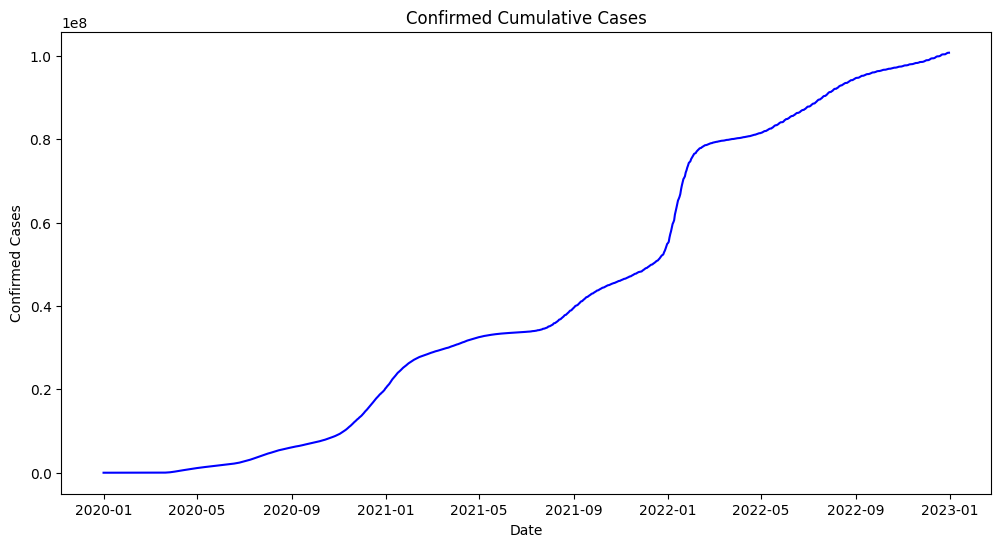

In [38]:
# Plotting confirmed number of cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedCases', data=df_usa_national, color='blue')
plt.title('Confirmed Cumulative Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

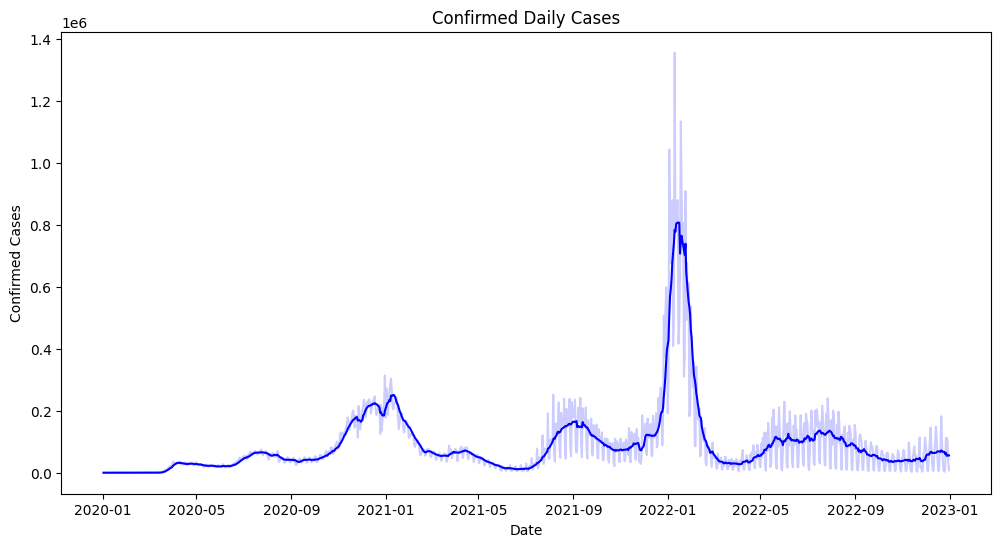

In [39]:
# Plotting confirmed number of daily cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyCases', data=df_usa_national, color='blue', alpha=0.2)
sns.lineplot(x='Date', y='Cases_7dayAvg', data=df_usa_national, color='blue')
plt.title('Confirmed Daily Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

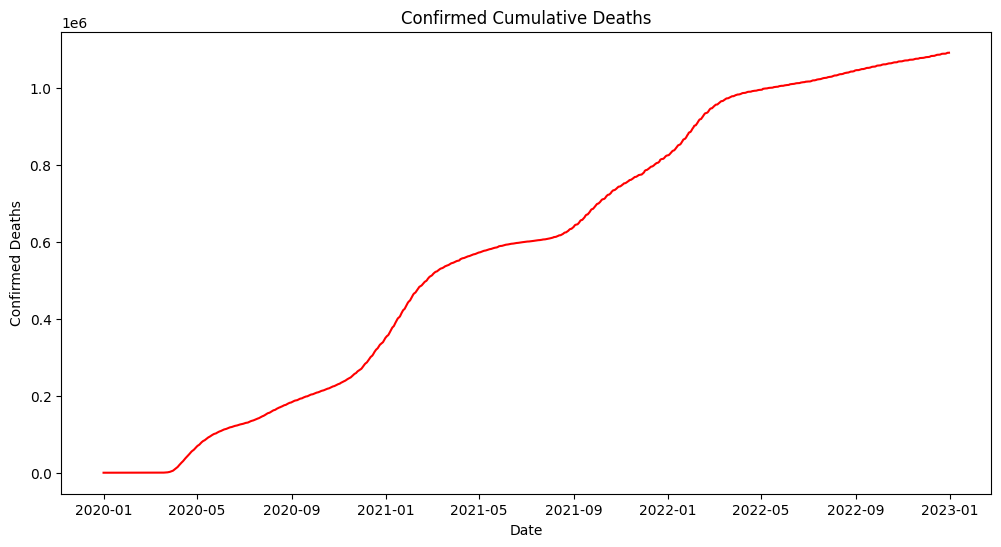

In [40]:
# Plotting confirmed number of deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedDeaths', data=df_usa_national, color='red')
plt.title('Confirmed Cumulative Deaths')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.show()

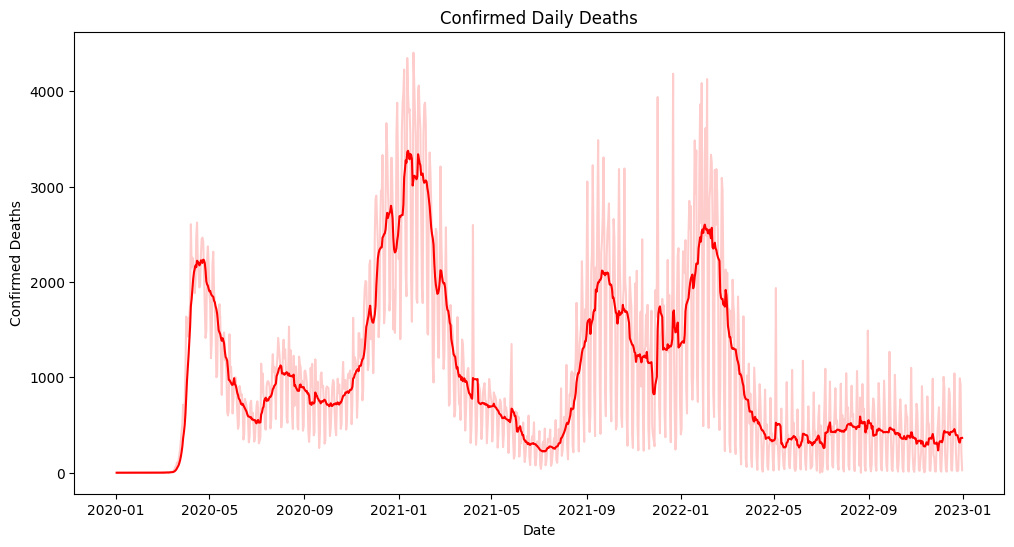

In [41]:
# Plotting confirmed number of daily deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyDeaths', data=df_usa_national, color='red', alpha=0.2)
sns.lineplot(x='Date', y='Deaths_7dayAvg', data=df_usa_national, color='red')
plt.title('Confirmed Daily Deaths')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.show()

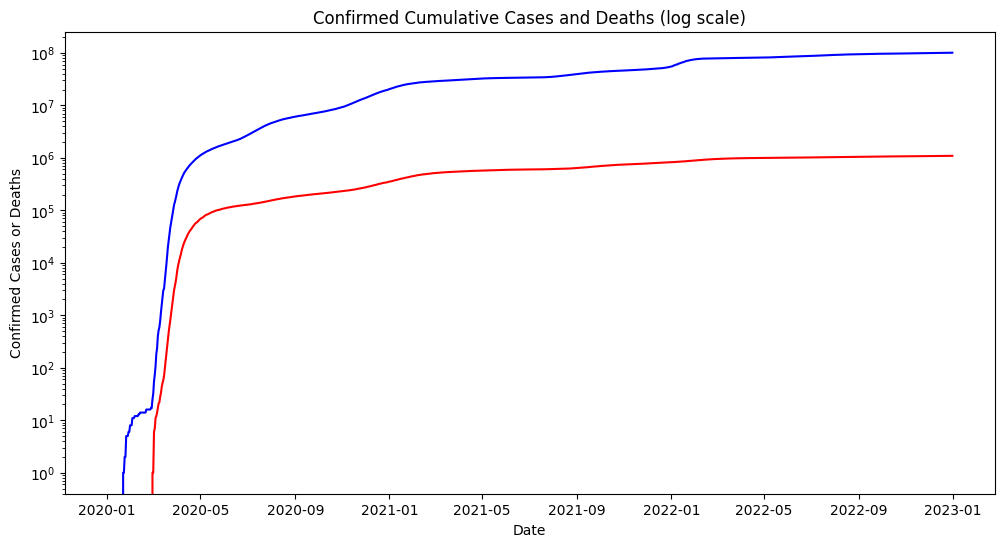

In [42]:
# Comparison on log scale (cumulative)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedCases', data=df_usa_national, color='blue')
sns.lineplot(x='Date', y='ConfirmedDeaths', data=df_usa_national, color='red')
plt.title('Confirmed Cumulative Cases and Deaths (log scale)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases or Deaths')
plt.yscale('log')
plt.show()

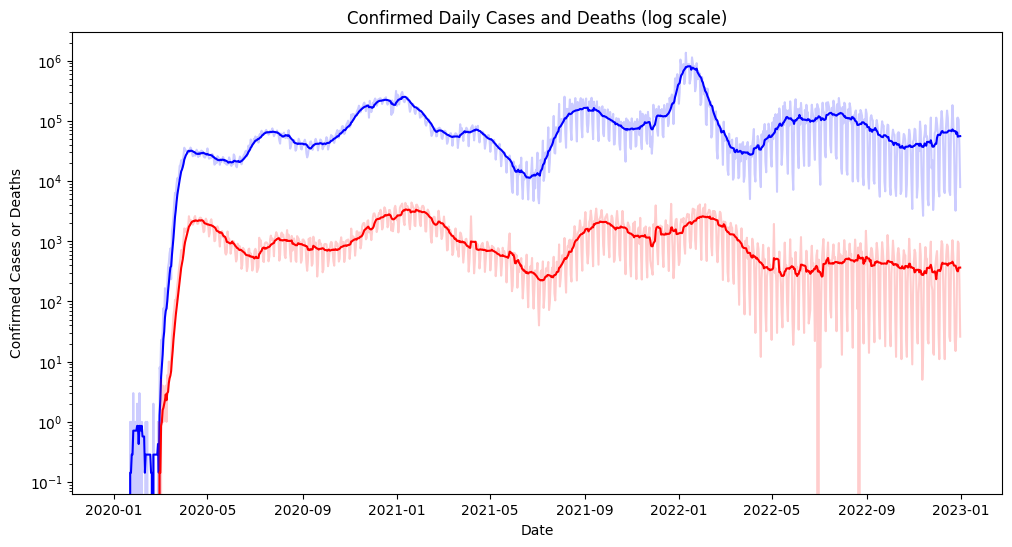

In [43]:
# Comparison on log scale (daily)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyCases', data=df_usa_national, color='blue', alpha=0.2)
sns.lineplot(x='Date', y='Cases_7dayAvg', data=df_usa_national, color='blue')
sns.lineplot(x='Date', y='DailyDeaths', data=df_usa_national, color='red', alpha=0.2)
sns.lineplot(x='Date', y='Deaths_7dayAvg', data=df_usa_national, color='red')
plt.title('Confirmed Daily Cases and Deaths (log scale)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases or Deaths')
plt.yscale('log')
plt.show()

### State

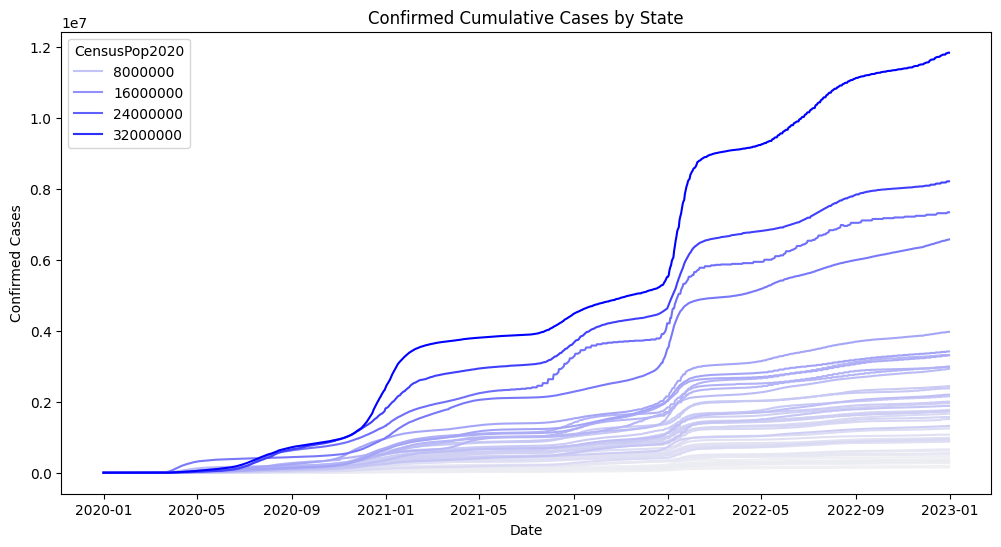

In [44]:
# All states cumulative cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedCases', data=df_usa_state, hue='CensusPop2020', palette=sns.color_palette("light:blue", as_cmap=True))
plt.title('Confirmed Cumulative Cases by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

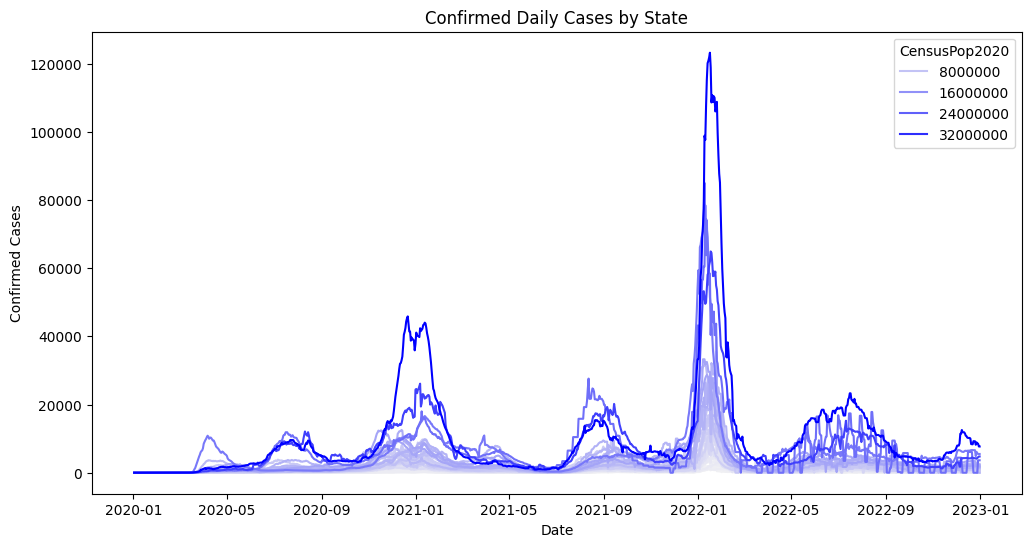

In [45]:
# All states daily cases (7 day moving average)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cases_7dayAvg', data=df_usa_state, hue='CensusPop2020', palette=sns.color_palette("light:blue", as_cmap=True))
plt.title('Confirmed Daily Cases by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

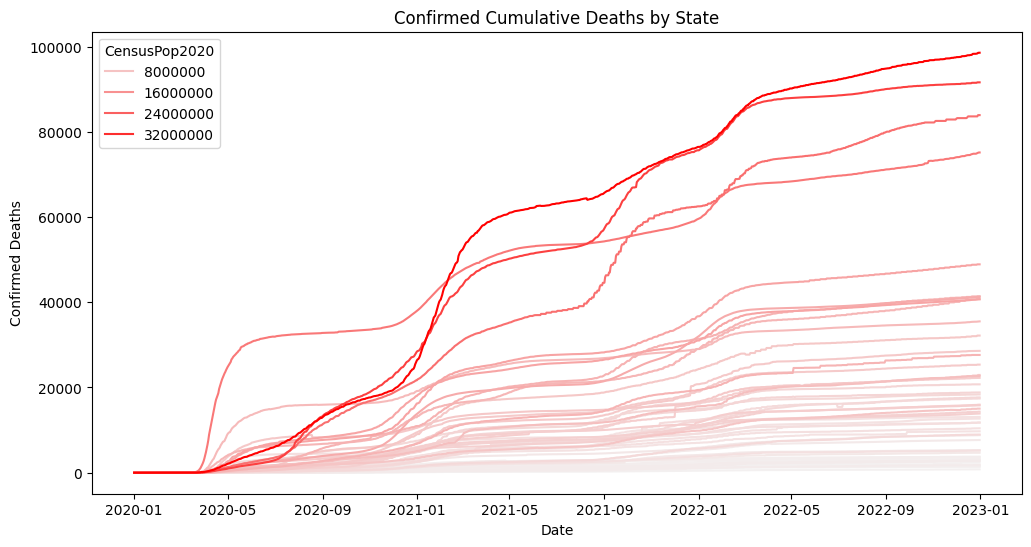

In [46]:
# All states cumulative deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedDeaths', data=df_usa_state, hue='CensusPop2020', palette=sns.color_palette("light:red", as_cmap=True))
plt.title('Confirmed Cumulative Deaths by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.show()

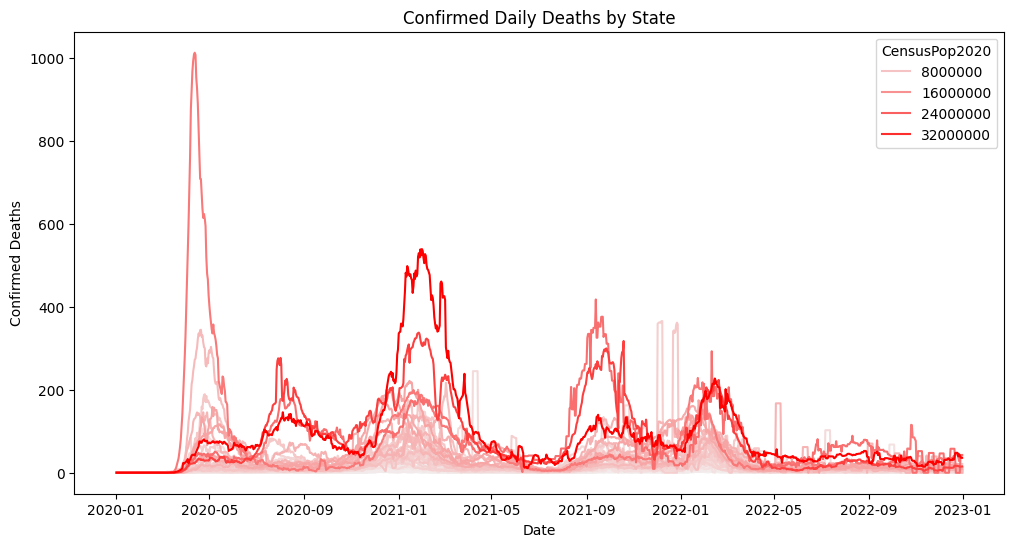

In [47]:
# All states daily deaths (7 day moving average)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths_7dayAvg', data=df_usa_state, hue='CensusPop2020', palette=sns.color_palette("light:red", as_cmap=True))
plt.title('Confirmed Daily Deaths by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.show()

Notice that the states with larger census populations (shown in darker color) tend to have more cases and deaths. So, to get a better sense of the proportion of people affected, we will have to use per capita data.

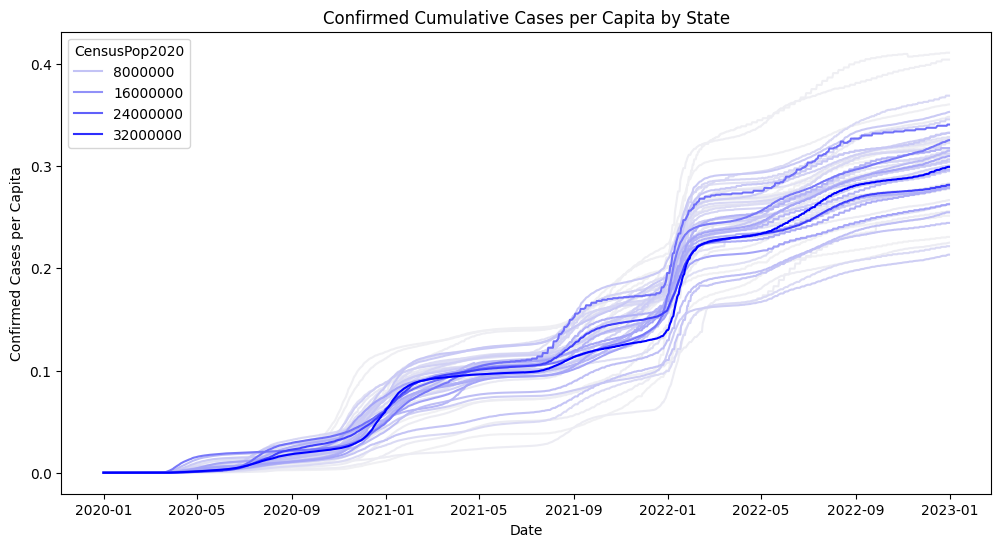

In [48]:
# All states cumulative per capita
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedCasesPerCapita', data=df_usa_state, hue='CensusPop2020', palette=sns.color_palette("light:blue", as_cmap=True))
plt.title('Confirmed Cumulative Cases per Capita by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases per Capita')
plt.show()

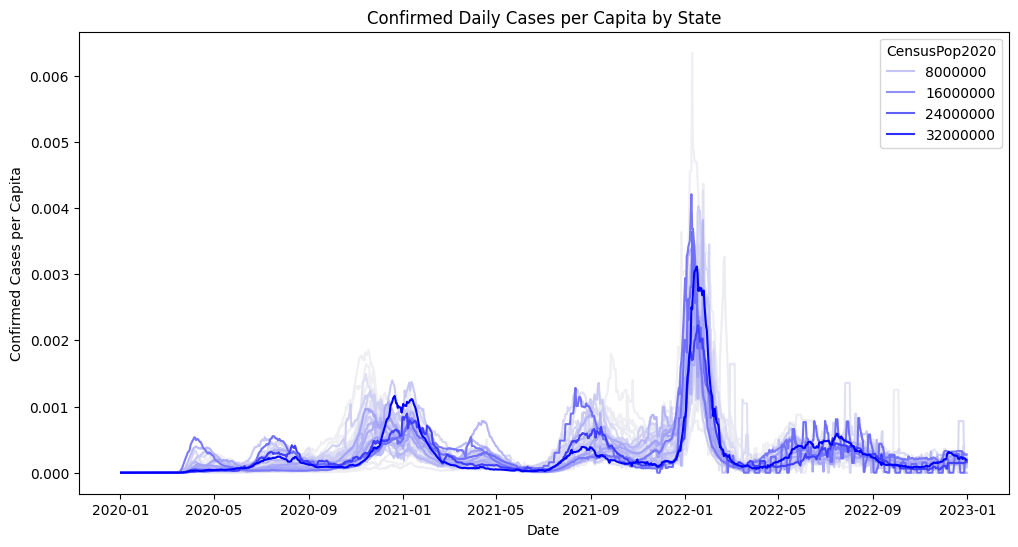

In [49]:
# All states daily cases per capita (7 day moving average)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cases_7dayAvgPerCapita', data=df_usa_state, hue='CensusPop2020', palette=sns.color_palette("light:blue", as_cmap=True))
plt.title('Confirmed Daily Cases per Capita by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases per Capita')
plt.show()

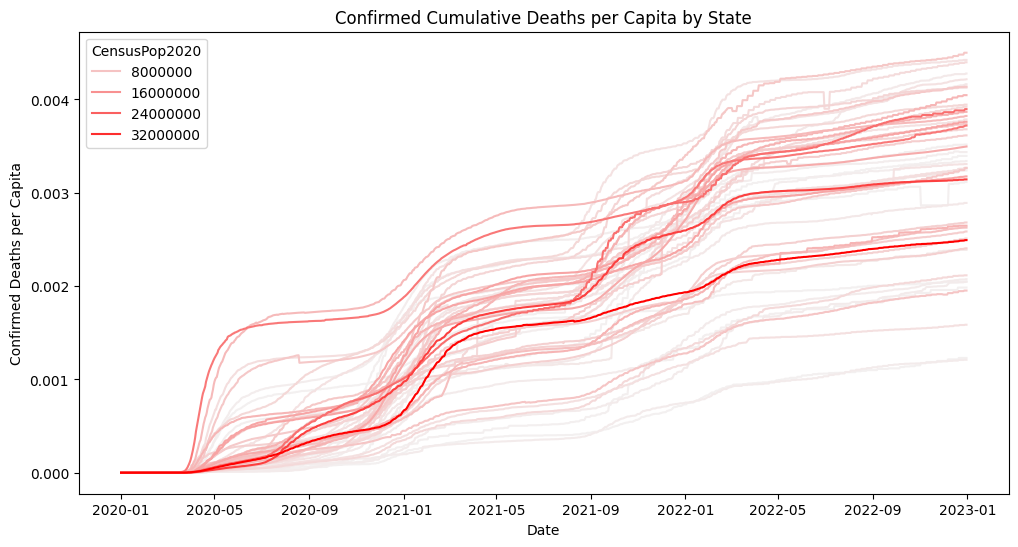

In [50]:
# All states cumulative deaths per capita
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedDeathsPerCapita', data=df_usa_state, hue='CensusPop2020', palette=sns.color_palette("light:red", as_cmap=True))
plt.title('Confirmed Cumulative Deaths per Capita by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths per Capita')
plt.show()

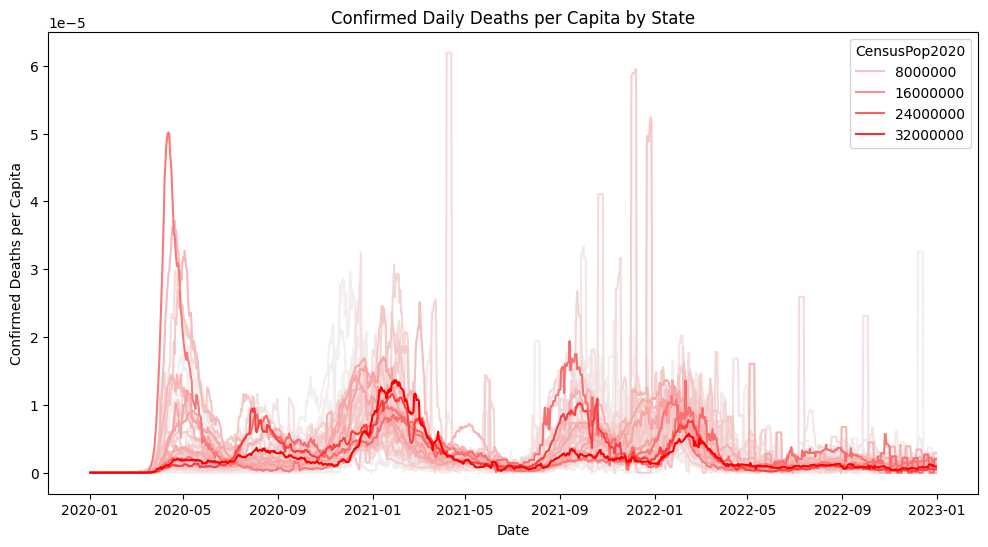

In [51]:
# All states daily deaths per capita (7 day moving average)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths_7dayAvgPerCapita', data=df_usa_state, hue='CensusPop2020', palette=sns.color_palette("light:red", as_cmap=True))
plt.title('Confirmed Daily Deaths per Capita by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths per Capita')
plt.show()

Now, the cases per capita and the population are less strongly correlated.

## Export resulting data tables, only including variables of interest

Examine which columns exist in the national-level and state-by-state data tables. For the remaining analyses, we will include data about case counts and mask stringency ('H6M_Facial Coverings' which has 100% completeness for both state and national tables). So, we only need to export the tables with the appropriate columns.

### National

In [52]:
columns_of_interest_all = [
  'ConfirmedCases',
  'ConfirmedDeaths',
  'DailyCases',
  'DailyDeaths',
  'Cases_7dayAvg',
  'Deaths_7dayAvg', 'ConfirmedCasesPerCapita',
  'ConfirmedDeathsPerCapita',
  'DailyCasesPerCapita',
  'DailyDeathsPerCapita',
  'Cases_7dayAvgPerCapita',
  'Deaths_7dayAvgPerCapita',
  'H6M_Facial Coverings']

In [53]:
list(df_usa_national.columns)

['CountryName',
 'CountryCode',
 'RegionName',
 'RegionCode',
 'Jurisdiction',
 'Date',
 'C1E_School closing',
 'C1E_Flag',
 'C1NV_School closing',
 'C1NV_Flag',
 'C1V_School closing',
 'C1V_Flag',
 'C1M_School closing',
 'C1M_Flag',
 'C1_Notes',
 'C2E_Workplace closing',
 'C2E_Flag',
 'C2NV_Workplace closing',
 'C2NV_Flag',
 'C2V_Workplace closing',
 'C2V_Flag',
 'C2M_Workplace closing',
 'C2M_Flag',
 'C2_Notes',
 'C3E_Cancel public events',
 'C3E_Flag',
 'C3NV_Cancel public events',
 'C3NV_Flag',
 'C3V_Cancel public events',
 'C3V_Flag',
 'C3M_Cancel public events',
 'C3M_Flag',
 'C3_Notes',
 'C4E_Restrictions on gatherings',
 'C4E_Flag',
 'C4NV_Restrictions on gatherings',
 'C4NV_Flag',
 'C4V_Restrictions on gatherings',
 'C4V_Flag',
 'C4M_Restrictions on gatherings',
 'C4M_Flag',
 'C4_Notes',
 'C5E_Close public transport',
 'C5E_Flag',
 'C5NV_Close public transport',
 'C5NV_Flag',
 'C5V_Close public transport',
 'C5V_Flag',
 'C5M_Close public transport',
 'C5M_Flag',
 'C5_Notes',
 

In [54]:
columns_of_interest_national = ['Date'] + columns_of_interest_all

In [55]:
df_usa_national_export = df_usa_national[columns_of_interest_national]

In [56]:
df_usa_national_export.head()

,Date,ConfirmedCases,ConfirmedDeaths,DailyCases,DailyDeaths,Cases_7dayAvg,Deaths_7dayAvg,ConfirmedCasesPerCapita,ConfirmedDeathsPerCapita,DailyCasesPerCapita,DailyDeathsPerCapita,Cases_7dayAvgPerCapita,Deaths_7dayAvgPerCapita,H6M_Facial Coverings
0,2020-01-01,0,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1,2020-01-02,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df_usa_national_export.shape

(1096, 14)

In [58]:
list(df_usa_state.columns)

['CountryName',
 'CountryCode',
 'RegionName',
 'RegionCode',
 'Jurisdiction',
 'Date',
 'C1E_School closing',
 'C1E_Flag',
 'C1NV_School closing',
 'C1NV_Flag',
 'C1V_School closing',
 'C1V_Flag',
 'C1M_School closing',
 'C1M_Flag',
 'C1_Notes',
 'C2E_Workplace closing',
 'C2E_Flag',
 'C2NV_Workplace closing',
 'C2NV_Flag',
 'C2V_Workplace closing',
 'C2V_Flag',
 'C2M_Workplace closing',
 'C2M_Flag',
 'C2_Notes',
 'C3E_Cancel public events',
 'C3E_Flag',
 'C3NV_Cancel public events',
 'C3NV_Flag',
 'C3V_Cancel public events',
 'C3V_Flag',
 'C3M_Cancel public events',
 'C3M_Flag',
 'C3_Notes',
 'C4E_Restrictions on gatherings',
 'C4E_Flag',
 'C4NV_Restrictions on gatherings',
 'C4NV_Flag',
 'C4V_Restrictions on gatherings',
 'C4V_Flag',
 'C4M_Restrictions on gatherings',
 'C4M_Flag',
 'C4_Notes',
 'C5E_Close public transport',
 'C5E_Flag',
 'C5NV_Close public transport',
 'C5NV_Flag',
 'C5V_Close public transport',
 'C5V_Flag',
 'C5M_Close public transport',
 'C5M_Flag',
 'C5_Notes',
 

In [59]:
columns_of_interest_state = [
  'Date',
  'RegionName',
  'RegionCode',
  'StateCodeShort',
  'Outcome2016',
  'Outcome2020',
  'CensusPop2020'
] + columns_of_interest_all

In [60]:
df_usa_state_export = df_usa_state[columns_of_interest_state]

In [61]:
df_usa_state_export.head()

,Date,RegionName,RegionCode,StateCodeShort,Outcome2016,Outcome2020,CensusPop2020,ConfirmedCases,ConfirmedDeaths,DailyCases,DailyDeaths,Cases_7dayAvg,Deaths_7dayAvg,ConfirmedCasesPerCapita,ConfirmedDeathsPerCapita,DailyCasesPerCapita,DailyDeathsPerCapita,Cases_7dayAvgPerCapita,Deaths_7dayAvgPerCapita,H6M_Facial Coverings
0,2020-01-01,Alaska,US_AK,AK,R,R,733391,0,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1,2020-01-02,Alaska,US_AK,AK,R,R,733391,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,Alaska,US_AK,AK,R,R,733391,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,Alaska,US_AK,AK,R,R,733391,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,Alaska,US_AK,AK,R,R,733391,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_usa_state_export.shape

(55896, 20)

In [63]:
df_usa_national_export.to_csv('df_usa_national_ms1.csv', index=False)
df_usa_state_export.to_csv('df_usa_state_ms1.csv', index=False)